# Agenda: 

## Application of supervised algorithms on Collected EEG Data for analysis of Human Emotions and implementation on Embedded C for application in Commercial Embedded Boards

# Data Source : 

### The data source has been received from Prof. Pulak Mondal & Prof. Anisha Halder Roy from the Department of Radiophysics & Electronics, Rajabazar Science College , University of Calcutta for preliminary analysis of feasibility of ML Algorithms on embedded systems. The training and the prediction will be performed directly on the following devices:

1. Atmel 328P - 8-bit AVR Microcontroller with 32K Bytes In-System Programmable Flash
2. ARM Cortex M4 - 32 bit microcontroller
3. Raspberry PI Pico - Arm Cortex-M0+ , 264KB on-chip SRAM; 2MB on-board QSPI flash

In [17]:
import numpy as np
import pandas as pd
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [18]:
data=pd.read_excel("./eeg data emotion/Sayantan Combine Data Set.xlsx")

In [19]:
data.head(5)

,PZ -REF,FP1-REF,FP2-REF,F7 -REF,F3 -REF,FZ -REF,F4 -REF,F8 -REF,T3 -REF,C3 -REF,CZ -REF,C4 -REF,T4 -REF,T5 -REF,P3 -REF,P4 -REF,T6 -REF,O1 -REF,OZ -REF,O2 -REF,Class
0,NaN,2,-72,-6,-19,-26,-112,-52,-12,10,-99,-10,12,28,-13,-7,4,30,-12,-14,Urge
1,4.0,-5,-80,-5,-22,-36,-131,-55,-14,10,-103,-18,-1,24,-13,-12,7,29,-15,-10,Urge
2,-6.0,-10,-84,1,-20,-40,-145,-55,-11,16,-101,-23,-12,26,-10,-14,9,29,-8,-7,Urge
3,-13.0,-9,-84,7,-14,-40,-154,-55,-7,22,-94,-27,-21,28,-10,-15,10,27,5,-5,Urge
4,-18.0,-4,-82,11,-8,-36,-162,-57,-4,26,-88,-32,-29,29,-12,-15,7,24,20,-6,Urge


In [26]:
data.head(1)

,PZ -REF,FP1-REF,FP2-REF,F7 -REF,F3 -REF,FZ -REF,F4 -REF,F8 -REF,T3 -REF,C3 -REF,CZ -REF,C4 -REF,T4 -REF,T5 -REF,P3 -REF,P4 -REF,T6 -REF,O1 -REF,OZ -REF,O2 -REF,Class
1,4.0,-5,-80,-5,-22,-36,-131,-55,-14,10,-103,-18,-1,24,-13,-12,7,29,-15,-10,Urge


Before we implement any algorithms on the data, Let us first see the shape of the data which we have

In [22]:
data.shape

(7679, 21)

We have 21 Features, of which 20 are the feature vectors and total 7678 samples in the data. Based on all the classification algorithms we have, we will be looking at

1. Logistic Regression for MultiModal
2. Gaussian Naive Bayes
3. Support Vector Machine
4. K Nearest Neighbour

All this algorithms will be explained for bimodal data, then extended for multimodal data which is our EEG data, and their implementations will be done on Python using sklearn and on embedded devices on C.

All this algorithms we will look we will follow a sequence of operations as :
1. Apply Algorithms on the data without any normalization or standardization on full data (7679, 21). (Implementation on Python)
2. Apply Algorithms on the data with normalization/standardization on full data (7679, 21). (Implementation on Python)
3. Apply Algorithms on the data with normalization/standardization on full data (7679, 21) and usage of PCA for feature extraction and reduction. (Implementation on Python)
4. Apply Algorithms on the data with normalization/standardization on sample data (100, 21) and usage of PCA for feature extraction and reduction for comparison with C Algorithms on Embedded Systems

# Concept of Classification

A classifier is a supervised learning algorithm that attempts to identify an a feature or a set of features whether they belong in one of two or more groups. In other words, the target variable in classification represents a class in a group of classes rather than a continuous number.

There are two types of classifications:

1. Generative Clasification
2. Discriminative Classification

Discriminative classification directly creates an observation’s class as a function of its input variables. 

Generative classification instead views the input variables as a function of the observation’s class. It first models the prior probability that an observation belongs to a given class, then calculates the probability of observing the observation’s input variables conditional on its class, and finally solves for the posterior probability of belonging to a given class using Bayes’ Rule.

# Logistic Regression

Logistic Regression is a discriminative method of classification as it will determine the observation class as a function of the input variables. Its formulas and mathematics is closely tied with Linear Regression. So let us first discuss on the Linear Regression and its optimization method : Gradient Descent 

The general equation for Logistic Regression stems for the logit function or the sigmoid function which gives us the probability of range of values from the range of real numbers to the domain between 0 and 1.

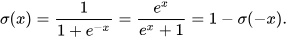

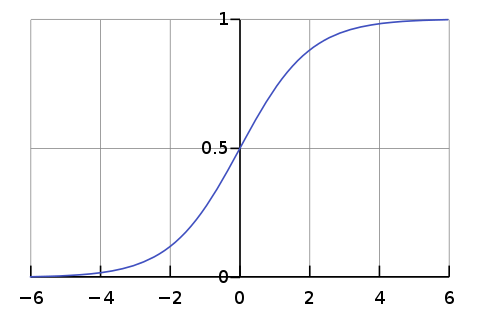

The detailed discussion for the logit function can be studied in detail in another article as given : https://mathworld.wolfram.com/SigmoidFunction.html

As we can see above that the the value of x can range from (-inf to _inf) and the values of the function will map them between 0 to 1 on the y axis.

This property finds use in the classification of probabilities from 0 to 1.

Here the value of X will be taken from the general equation of Linear Regression which ranges from features 0 to i and can be extended
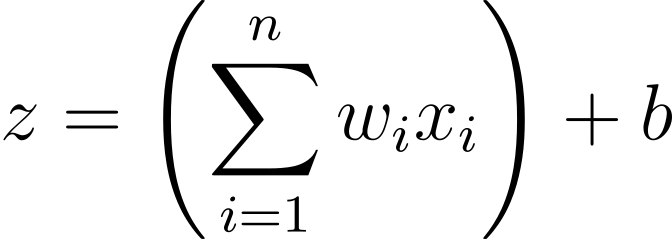

where wi=coeff of individual features ranging from 0 to i <br>
where xi=individual features ranging from 0 to i <br>
where c= bias of the regression <br>


now for all the feature data in input data, we can calculate the value of z from the above formula for every data sample data. Then this value will be applied to the sigmoid function to get the probability which will then be used for classification.

In [20]:
data.dropna(inplace=True)

In [22]:
data['Class'].value_counts()

Class
Rage            2560
Satisfaction    2560
Urge            2558
Name: count, dtype: int64

In [23]:
# getting data segregated to X and Y data

X=data.iloc[:,:20].values
Y=data.iloc[:,20:].values

from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler=StandardScaler()
encoder=LabelEncoder()


X_stan=scaler.fit_transform(X)
Y_stan=encoder.fit_transform(Y)

c:\Users\Rohit Maity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
X_stan

array([[ 1.75900456e-01,  4.60364441e-02, -7.98829954e-01,
         1.25408075e-01, -8.66351444e-02, -2.81430509e-01,
        -1.03267120e+00, -4.22559856e-01, -7.00824085e-03,
         2.58585825e-01, -8.40863099e-01, -3.11909272e-02,
         1.75759895e-01,  3.79167768e-01, -2.89676487e-02,
         8.84850700e-02,  1.35413720e-01,  3.55633854e-01,
        -3.91782252e-02,  3.84753801e-02],
       [ 8.11453344e-02,  1.10673288e-02, -8.41831790e-01,
         1.70965701e-01, -6.67069069e-02, -3.24232229e-01,
        -1.15486983e+00, -4.22559856e-01, -2.71962419e-03,
         3.13164371e-01, -8.22527034e-01, -8.02032352e-02,
         8.32072777e-02,  3.95687093e-01, -1.37062578e-03,
         6.97521070e-02,  1.45069869e-01,  3.55633854e-01,
         1.30043901e-02,  4.51873000e-02],
       [ 1.48167491e-02,  1.80611518e-02, -8.41831790e-01,
         2.16523326e-01, -6.92219450e-03, -3.24232229e-01,
        -1.23342610e+00, -4.22559856e-01,  2.99853136e-03,
         3.67742918e-01, -7.5

In [25]:
Y_stan

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


logistic_model=LogisticRegression(multi_class='ovr')
bayes_model=GaussianNB()
svc_model=SVC()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

X_Train,X_Test,Y_Train,Y_Test=train_test_split(X_stan,Y_stan,test_size=0.2,random_state=0)

1/(2*pi*sd^2)*e-(X-X_mean)^2/sd^2

# With Standardization

In [42]:
logistic_model.fit(X_Train,Y_Train)
Y_Pred=logistic_model.predict(X_Test)

print(accuracy_score(Y_Pred,Y_Test))
print(confusion_matrix(Y_Pred,Y_Test))

0.611328125
[[333  67 174]
 [112 368  96]
 [ 68  80 238]]


In [43]:
bayes_model.fit(X_Train,Y_Train)
Y_Pred=bayes_model.predict(X_Test)

print(accuracy_score(Y_Pred,Y_Test))
print(confusion_matrix(Y_Pred,Y_Test))

0.8489583333333334
[[392   7  42]
 [ 56 458  12]
 [ 65  50 454]]


In [44]:
svc_model.fit(X_Train,Y_Train)
Y_Pred=svc_model.predict(X_Test)

print(accuracy_score(Y_Pred,Y_Test))
print(confusion_matrix(Y_Pred,Y_Test))

0.9928385416666666
[[509   0   0]
 [  0 508   0]
 [  4   7 508]]


# Without Standardization

In [46]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [47]:
logistic_model.fit(X_Train,Y_Train)
Y_Pred=logistic_model.predict(X_Test)

print(accuracy_score(Y_Pred,Y_Test))
print(confusion_matrix(Y_Pred,Y_Test))

c:\Users\Rohit Maity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rohit Maity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.611328125
[[350  79 200]
 [103 370  89]
 [ 60  66 219]]


In [48]:
bayes_model.fit(X_Train,Y_Train)
Y_Pred=bayes_model.predict(X_Test)

print(accuracy_score(Y_Pred,Y_Test))
print(confusion_matrix(Y_Pred,Y_Test))

0.8489583333333334
[[392   7  42]
 [ 56 458  12]
 [ 65  50 454]]


c:\Users\Rohit Maity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
svc_model.fit(X_Train,Y_Train)
Y_Pred=svc_model.predict(X_Test)

print(accuracy_score(Y_Pred,Y_Test))
print(confusion_matrix(Y_Pred,Y_Test))

c:\Users\Rohit Maity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9700520833333334
[[502   4   0]
 [  0 480   0]
 [ 11  31 508]]


# With PCA

In [77]:
from sklearn.decomposition import PCA

pca=PCA()

pca.fit(X_stan)

PCA()

In [78]:
pca.components_

array([[ 0.25622306,  0.05089501,  0.1561128 ,  0.23850447,  0.25605574,
         0.25419115,  0.20178535,  0.23958065,  0.11699736,  0.26083415,
         0.26021033,  0.2550333 ,  0.2287248 ,  0.23487837,  0.2569542 ,
         0.26090878,  0.20275515,  0.23466423,  0.23977024,  0.11174647],
       [-0.12393034, -0.12554003, -0.33317335,  0.25763388, -0.00723252,
        -0.14191308, -0.20044179, -0.18054223,  0.52767419,  0.02368634,
        -0.03920778, -0.13821623,  0.01296928, -0.07727697, -0.06506382,
        -0.0389641 ,  0.33875688,  0.07845651,  0.1107095 ,  0.50382088],
       [ 0.18595016, -0.59424901, -0.41587268, -0.01173616,  0.21548939,
         0.09550338, -0.28594565,  0.07265212, -0.15430219,  0.13340371,
         0.19865624,  0.21312533, -0.02295659, -0.21677491, -0.0713304 ,
         0.08694416,  0.01391384, -0.23363055,  0.07166009, -0.22368038],
       [-0.09238478,  0.50654537,  0.05556808, -0.01985041,  0.17226709,
         0.13702282, -0.14027087, -0.083772  , -

In [79]:
pca.explained_variance_

array([12.65609994,  2.32767807,  1.62011299,  0.66125979,  0.61825525,
        0.38240831,  0.32681924,  0.27449211,  0.22676704,  0.21118992,
        0.13432154,  0.11155504,  0.10078414,  0.09345098,  0.06121458,
        0.05377226,  0.04838864,  0.03732915,  0.0303066 ,  0.0263996 ])

In [80]:
pca.explained_variance_ratio_

array([0.63272258, 0.11636875, 0.0809951 , 0.03305868, 0.03090874,
       0.01911793, 0.01633883, 0.01372282, 0.01133688, 0.01055812,
       0.0067152 , 0.00557703, 0.00503855, 0.00467194, 0.00306033,
       0.00268826, 0.00241912, 0.00186621, 0.00151513, 0.00131981])

In [81]:
X_PCA=pca.fit_transform(X_stan)

In [82]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X_PCA,Y,test_size=0.2,random_state=0)

In [83]:
logistic_model.fit(X_Train,Y_Train)
Y_Pred=logistic_model.predict(X_Test)

print(accuracy_score(Y_Pred,Y_Test))
print(confusion_matrix(Y_Pred,Y_Test))

0.611328125
[[333  67 174]
 [112 368  96]
 [ 68  80 238]]


c:\Users\Rohit Maity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
bayes_model.fit(X_Train,Y_Train)
Y_Pred=bayes_model.predict(X_Test)

print(accuracy_score(Y_Pred,Y_Test))
print(confusion_matrix(Y_Pred,Y_Test))

0.857421875
[[394  13   5]
 [ 73 453  33]
 [ 46  49 470]]


c:\Users\Rohit Maity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
svc_model.fit(X_Train,Y_Train)
Y_Pred=svc_model.predict(X_Test)

print(accuracy_score(Y_Pred,Y_Test))
print(confusion_matrix(Y_Pred,Y_Test))

c:\Users\Rohit Maity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9928385416666666
[[509   0   0]
 [  0 508   0]
 [  4   7 508]]
